In [2]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
player = pd.read_csv('data/baseball/player.csv', usecols=[0,1,13,14,15,16,17,18,19,20,21])
salary = pd.read_csv('data/baseball/salary.csv')
appearances = pd.read_csv('data/baseball/appearances.csv')
batting = pd.read_csv('data/baseball/batting.csv')
fielding = pd.read_csv('data/baseball/fielding.csv')
team = pd.read_csv('data/baseball/team.csv')
pitching = pd.read_csv('data/baseball/pitching.csv')

In [4]:
app_player = appearances.merge(player).sort_values(by=['year', 'team_id', 'player_id']).reset_index()

In [5]:
app_player['age'] = app_player.year - app_player.birth_year
app_player['years_in_mlb'] = app_player.year - app_player.debut.dropna().str[0:4].astype(int)

In [6]:
appearances['age'] = app_player.age
appearances['years_in_mlb'] = app_player.years_in_mlb

For the project, we are looking at the importance of salary for building a baseball team.

### Salary Over Time

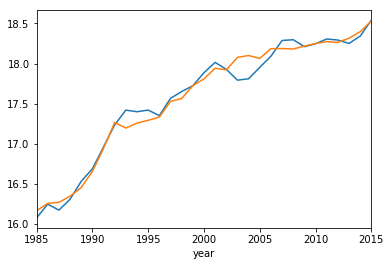

In [8]:
np.log(salary[salary.league_id == 'AL'].groupby(['year', 'team_id'])['salary'].sum().groupby('year').median()).plot()
np.log(salary[salary.league_id == 'NL'].groupby(['year', 'team_id'])['salary'].sum().groupby('year').median()).plot()

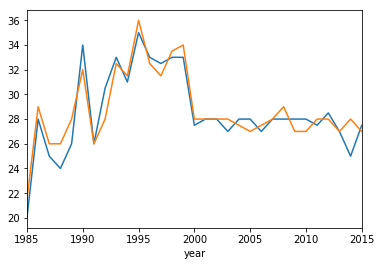

In [9]:
(salary[salary.league_id == 'AL'].groupby(['year', 'team_id']).size().groupby('year').median()).plot()
(salary[salary.league_id == 'NL'].groupby(['year', 'team_id']).size().groupby('year').median()).plot()

In [10]:
salary[salary.year == 2015].groupby('team_id')['salary'].sum().median() / salary[salary.year == 1985].groupby('team_id')['salary'].sum().median()

11.202202483475384

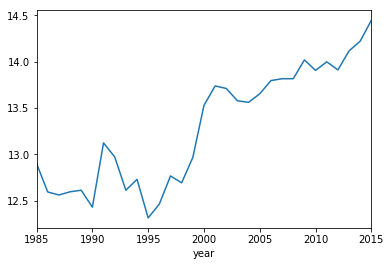

In [11]:
np.log(salary.groupby('year')['salary'].median()).plot()

In [12]:
for year in range(2011, 2016):
    stats = salary[(salary.league_id == 'AL') & (salary.year == year)].groupby(['team_id'])['salary'].sum().describe()
    print(f'{year}:\n{stats}\n')

2011:
count    1.400000e+01
mean     9.765480e+07
std      4.793501e+07
min      3.571200e+07
25%      6.355998e+07
50%      8.920493e+07
75%      1.240260e+08
max      2.022750e+08
Name: salary, dtype: float64

2012:
count    1.400000e+01
mean     1.043745e+08
std      4.438653e+07
min      5.537250e+07
25%      7.559540e+07
50%      8.803155e+07
75%      1.293527e+08
max      1.965223e+08
Name: salary, dtype: float64

2013:
count    1.500000e+01
mean     1.022085e+08
std      5.141290e+07
min      1.789070e+07
25%      7.467127e+07
50%      8.439333e+07
75%      1.252314e+08
max      2.319789e+08
Name: salary, dtype: float64

2014:
count    1.500000e+01
mean     1.018388e+08
std      3.967335e+07
min      3.511630e+07
25%      7.612299e+07
50%      9.253110e+07
75%      1.171217e+08
max      1.975439e+08
Name: salary, dtype: float64

2015:
count    1.600000e+01
mean     1.137962e+08
std      4.946412e+07
min      4.875000e+06
25%      8.551120e+07
50%      1.126830e+08
75%      1.275

In [13]:
for year in range(2011, 2016):
    stats = salary[(salary.league_id == 'NL') & (salary.year == year)].groupby(['team_id'])['salary'].sum().describe()
    print(f'{year}:\n{stats}\n')

2011:
count    1.600000e+01
mean     8.858363e+07
std      3.446501e+07
min      4.504700e+07
25%      6.212870e+07
50%      8.625001e+07
75%      1.086248e+08
max      1.729764e+08
Name: salary, dtype: float64

2012:
count    1.600000e+01
mean     9.196861e+07
std      2.892415e+07
min      5.524470e+07
25%      7.700339e+07
50%      8.551349e+07
75%      1.008157e+08
max      1.745389e+08
Name: salary, dtype: float64

2013:
count    1.500000e+01
mean     1.000932e+08
std      4.788972e+07
min      3.360190e+07
25%      7.567805e+07
50%      9.013200e+07
75%      1.100539e+08
max      2.233622e+08
Name: salary, dtype: float64

2014:
count    1.600000e+01
mean     1.040459e+08
std      5.201297e+07
min      4.500000e+06
25%      7.680492e+07
50%      9.773525e+07
75%      1.235157e+08
max      2.170146e+08
Name: salary, dtype: float64

2015:
count    1.500000e+01
mean     1.128935e+08
std      4.078062e+07
min      5.695900e+07
25%      9.229055e+07
50%      1.116930e+08
75%      1.188

### Distributions

#### By year (individual players)

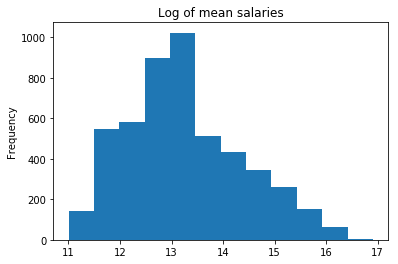

In [14]:
np.log(salary.groupby('player_id')['salary'].mean()).plot(kind='hist', bins=12, title='Log of mean salaries')

In [15]:
def distribution_salary(year):
    np.log(salary[(salary.year == year)].salary).plot(kind='hist', bins=20, title=f'Log salaries in {year}')

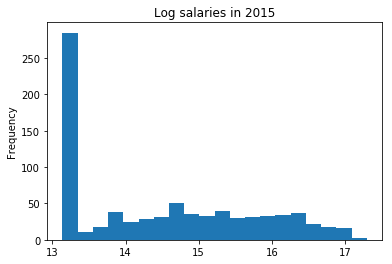

In [16]:
distribution_salary(2015)

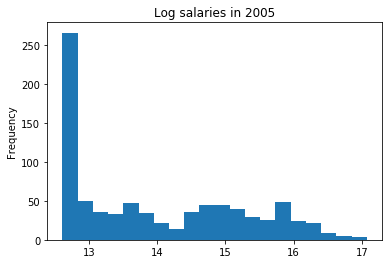

In [17]:
distribution_salary(2005)

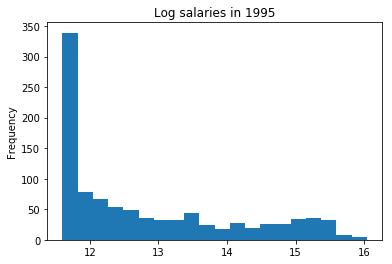

In [18]:
distribution_salary(1995)

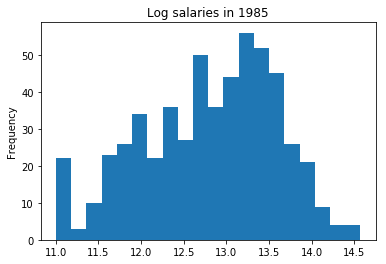

In [19]:
distribution_salary(1985)

1985 is the only year in which the distributions of individual salaries appears to be fairly normal.

#### By year (team totals)

In [20]:
import seaborn as sns

In [21]:
team_salary = team.merge(salary)
winners = team_salary[(team_salary.w / team_salary.l) >= 1]
losers = team_salary[(team_salary.w / team_salary.l) < 1]

In [22]:
def distribution_team_salary(year):
    np.log(winners[(winners.year == year)].groupby('team_id')['salary'].sum()).plot(
        kind='hist', bins=8, title=f'Log team salaries {year}', alpha=0.5)
    np.log(losers[(losers.year == year)].groupby('team_id')['salary'].sum()).plot(
        kind='hist', bins=8, title=f'Log team salaries {year}', alpha=0.5)
    np.log(winners[(winners.year == year) & (winners.ws_win == 'Y')].groupby('team_id')['salary'].sum()).plot(
        kind='hist', bins=8, title=f'Log team salaries {year}', alpha=0.5)

Blue bars represent teams with a record better than .500, orange bars are teams with less than .500.

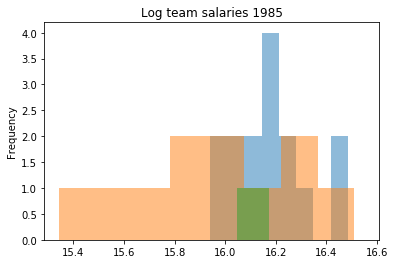

In [23]:
distribution_team_salary(1985)

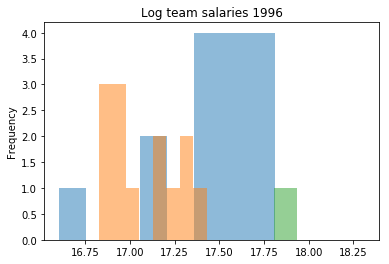

In [24]:
distribution_team_salary(1996)

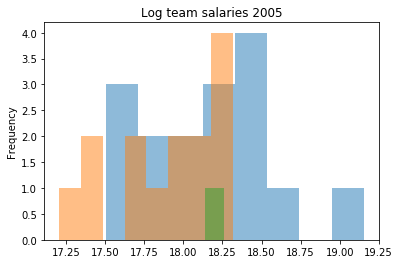

In [25]:
distribution_team_salary(2005)

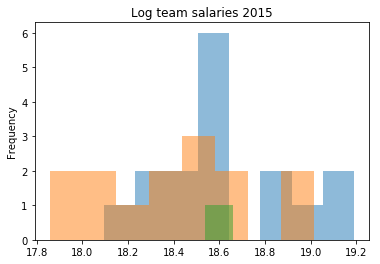

In [26]:
distribution_team_salary(2015)

In [27]:
(salary[salary.year == 2015].groupby('team_id')['salary'].sum() / 1000000).describe()

count     30.000000
mean     117.138086
std       40.371667
min       61.834000
25%       90.591524
50%      112.683050
75%      121.657879
max      215.792000
Name: salary, dtype: float64

### Scatterplots and Regressions

#### Do Higher Team Salaries Translate to More Wins?

In [68]:
team_salary = team.merge(salary)

In [111]:
def salary_year(year):
    team_salary_year = team_salary[team_salary.year == year]
    wins = team_salary_year.groupby('team_id')['w'].median()
    salary_total = team_salary_year.groupby('team_id')['salary'].sum()
    rel_salary_total = (salary_total - salary_total.mean()) / salary_total.std()
    ws = team_salary_year[team_salary_year.ws_win == 'Y']
    ws_salary = (ws.groupby('team_id')['salary'].sum() - salary_total.mean()) / salary_total.std()
    ws_wins = ws.groupby('team_id')['w'].median()
    return wins, rel_salary_total, ws_salary, ws_wins

In [115]:
def wins_salary_graph(year):
    wins, salary_total, ws_salary, ws_wins = salary_year(year)
    plt.scatter(salary_total, wins)
    plt.scatter(ws_salary, ws_wins)
    plt.ylabel("Team wins")
    plt.xlabel("Difference in team salary from mean by std")
    plt.title(f"How does salary impact wins?\n{year} season")

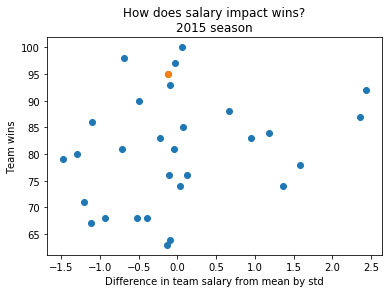

In [114]:
wins_salary_graph(2015)

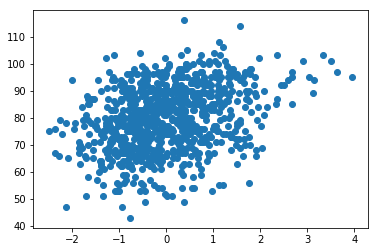

In [101]:
def salary_total():
    wins = team_salary.groupby(['year','team_id'])['w'].median().reset_index('year').drop('year',axis=1)
    salary_total = team_salary.groupby(['year','team_id'])['salary'].sum()
    rel_salary_total = (salary_total.xs(1985) - salary_total.xs(1985).mean()) / salary_total.xs(1985).std()
    for year in range(1986,2016):
        rel_salary = (salary_total.xs(year) - salary_total.xs(year).mean()) / salary_total.xs(year).std()
        rel_salary_total = pd.concat([rel_salary_total,rel_salary])
        ws = team_salary_year[team_salary_year.ws_win == 'Y']
        ws_salary = (ws.groupby('team_id')['salary'].sum() - salary_total.mean()) / salary_total.std()
        ws_wins = ws.groupby('team_id')['w'].median()
    return wins, rel_salary_total
wins, salary = salary_total()
plt.scatter(salary, wins)

In [102]:
y, X = salary_total()
X = sm.add_constant(X)
results = smf.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     109.4
Date:                Tue, 14 Nov 2017   Prob (F-statistic):           3.18e-24
Time:                        09:38:28   Log-Likelihood:                -3405.6
No. Observations:                 888   AIC:                             6815.
Df Residuals:                     886   BIC:                             6825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.9110      0.376    212.308      0.0

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/jnelson/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [88]:
for year in range(1985, 2016):
    y, X = salary_year(year)
    #X = np.log(X)
    X = sm.add_constant(X)
    results = smf.OLS(y, X).fit()
    print(f'\nFor {year}:\n{results.summary()}')


For 1985:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     3.180
Date:                Tue, 14 Nov 2017   Prob (F-statistic):             0.0872
Time:                        09:20:43   Log-Likelihood:                -100.59
No. Observations:                  26   AIC:                             205.2
Df Residuals:                      24   BIC:                             207.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.8077      2.365     34.1

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

For 2000:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     3.447
Date:                Tue, 14 Nov 2017   Prob (F-statistic):             0.0739
Time:                        09:20:43   Log-Likelihood:                -109.35
No. Observations:                  30   AIC:                             222.7
Df Residuals:                      28   BIC:                             225.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


For 2013:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.761
Date:                Tue, 14 Nov 2017   Prob (F-statistic):              0.108
Time:                        09:20:43   Log-Likelihood:                -115.83
No. Observations:                  30   AIC:                             235.7
Df Residuals:                      28   BIC:                             238.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.0333      2.172     37.3

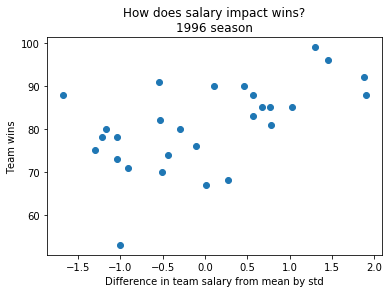

In [89]:
wins_salary_graph(1996)

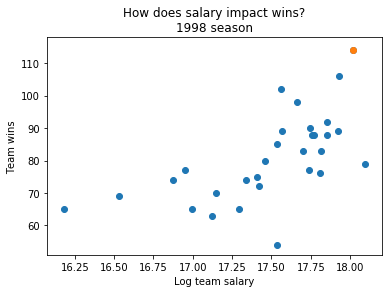

In [35]:
wins_salary_graph(1998)

#### What about the spread of salaries?

In [36]:
def salary_dist_year(year):
    team_salary_year = team_salary[team_salary.year == year]
    wins = team_salary_year.groupby('team_id')['w'].median()
    salary_total = team_salary_year.groupby('team_id')['salary'].sum()
    salary_dist = team_salary_year.groupby('team_id')['salary'].std()
    return wins, salary_total, salary_dist

In [37]:
for year in range(1985, 2016):
    y, X1, X2 = salary_dist_year(year)
    X = pd.concat([X1,X2],axis=1)
    X = np.log(X)
    X = sm.add_constant(X)
    results = smf.OLS(y, X).fit()
    print(f'\nFor {year}:\n{results.summary()}')


For 1985:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     2.390
Date:                Tue, 14 Nov 2017   Prob (F-statistic):              0.114
Time:                        08:58:43   Log-Likelihood:                -99.749
No. Observations:                  26   AIC:                             205.5
Df Residuals:                      23   BIC:                             209.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -193.4270    142.681     -1.3


For 1998:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     9.654
Date:                Tue, 14 Nov 2017   Prob (F-statistic):           0.000687
Time:                        08:58:43   Log-Likelihood:                -112.11
No. Observations:                  30   AIC:                             230.2
Df Residuals:                      27   BIC:                             234.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -277.2724     81.564     -3.3


For 2009:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     4.517
Date:                Tue, 14 Nov 2017   Prob (F-statistic):             0.0203
Time:                        08:58:43   Log-Likelihood:                -110.83
No. Observations:                  30   AIC:                             227.7
Df Residuals:                      27   BIC:                             231.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -153.6027     98.125     -1.5

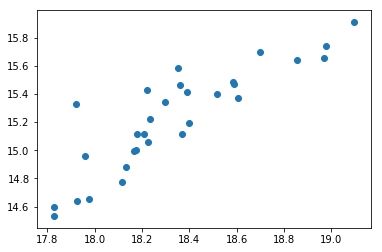

In [38]:
y, X1, X2 = salary_dist_year(2012)
X = pd.concat([X1,X2],axis=1)
plt.scatter(np.log(X1),np.log(X2))

### Salary by Position

In [39]:
appearances[appearances.year > 1984].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38746 entries, 62205 to 100950
Data columns (total 23 columns):
year            38746 non-null int64
team_id         38746 non-null object
league_id       38746 non-null object
player_id       38746 non-null object
g_all           38543 non-null float64
gs              38543 non-null float64
g_batting       38746 non-null int64
g_defense       38543 non-null float64
g_p             38746 non-null int64
g_c             38746 non-null int64
g_1b            38746 non-null int64
g_2b            38746 non-null int64
g_3b            38746 non-null int64
g_ss            38746 non-null int64
g_lf            38746 non-null int64
g_cf            38746 non-null int64
g_rf            38746 non-null int64
g_of            38746 non-null int64
g_dh            38746 non-null float64
g_ph            38746 non-null float64
g_pr            34360 non-null float64
age             38739 non-null float64
years_in_mlb    38739 non-null float64
dtypes: float64(

In [40]:
appearances['str_pos'] = appearances[['g_p', 'g_c', 'g_1b', 'g_2b', 'g_3b', 'g_ss',
                                'g_lf', 'g_cf', 'g_rf', 'g_dh']].idxmax(axis=1).str.replace('g_', '')

In [41]:
appearances[appearances.year > 1984].groupby('str_pos').size()

str_pos
1b     2171
2b     2308
3b     2230
c      3172
cf     1978
dh      810
lf     2857
p     18971
rf     2250
ss     1999
dtype: int64

#### Do starters play more seasons than non-starters?

A friend suggested there may be a relationship between number of games played per year and how long a player remains in the MLB. The scatterplot below shows somewhat of a U-shaped relationship between the two. The cluster in the bottom-left are a majority of players who rarely start games and only play in the MLB for a few years.

In [42]:
app_salary = appearances.merge(salary)
app_salary

,year,team_id,league_id,player_id,g_all,gs,g_batting,g_defense,g_p,g_c,...,g_cf,g_rf,g_of,g_dh,g_ph,g_pr,age,years_in_mlb,str_pos,salary
0,1985,ATL,NL,barkele01,20.0,18.0,20,20.0,20,0,...,0,0,0,0.0,0.0,0.0,30.0,9.0,p,870000
1,1985,ATL,NL,bedrost01,37.0,37.0,37,37.0,37,0,...,0,0,0,0.0,0.0,0.0,28.0,4.0,p,550000
2,1985,ATL,NL,benedbr01,70.0,67.0,70,70.0,0,70,...,0,0,0,0.0,0.0,0.0,30.0,7.0,c,545000
3,1985,ATL,NL,campri01,66.0,2.0,66,66.0,66,0,...,0,0,0,0.0,0.0,0.0,32.0,9.0,p,633333
4,1985,ATL,NL,ceronri01,96.0,76.0,96,90.0,0,90,...,0,0,0,0.0,8.0,0.0,31.0,10.0,c,625000
5,1985,ATL,NL,chambch01,101.0,27.0,101,39.0,0,0,...,0,0,0,0.0,65.0,0.0,37.0,14.0,1b,800000
6,1985,ATL,NL,dedmoje01,60.0,0.0,60,60.0,60,0,...,0,0,0,0.0,0.0,0.0,25.0,2.0,p,150000
7,1985,ATL,NL,forstte01,46.0,0.0,46,46.0,46,0,...,0,0,0,0.0,0.0,0.0,33.0,14.0,p,483333
8,1985,ATL,NL,garbege01,59.0,0.0,59,59.0,59,0,...,0,0,0,0.0,0.0,0.0,38.0,16.0,p,772000
9,1985,ATL,NL,harpete01,138.0,124.0,138,131.0,0,0,...,0,2,131,0.0,13.0,0.0,30.0,5.0,lf,250000


In [43]:
seasons = app_salary.groupby('player_id').size()
gs = app_salary.groupby('player_id')['gs'].mean()
g = app_salary.groupby('player_id')['g_all'].mean()
age = app_salary.groupby('player_id')['age'].max()

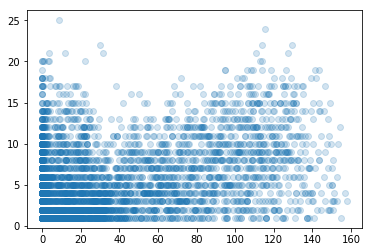

In [44]:
plt.scatter(gs, seasons, alpha=0.2)

#### Salary by position

In [45]:
app_salary[app_salary.year == 2015].groupby('str_pos')['salary'].median() / 1000000

str_pos
1b    3.10000
2b    1.07500
3b    2.52500
c     1.03750
cf    1.65000
dh    6.58300
lf    2.10000
p     1.48000
rf    4.10000
ss    1.44375
Name: salary, dtype: float64

In [46]:
positions = {}
for pos in ['p', 'c', '1b', '2b', '3b', 'ss', 'lf', 'cf', 'rf', 'dh']:
    positions[(pos.replace('', ''))] = app_salary[app_salary.str_pos == pos]

In [47]:
def distribution_salary_pos(year, pos):
    pos_df = app_salary[app_salary.str_pos == pos]
    np.log(pos_df[(pos_df.year == year)].groupby('player_id')['salary'].mean()).plot(
        kind='hist', bins=10, title=f'Log salaries for {pos} in {year}', alpha=0.5)

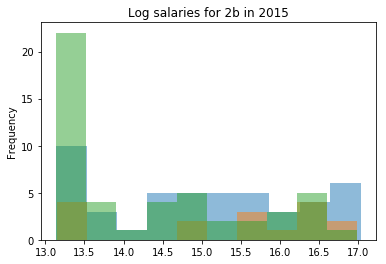

In [48]:
distribution_salary_pos(2015, '1b')
distribution_salary_pos(2015, 'dh')
distribution_salary_pos(2015, '2b')

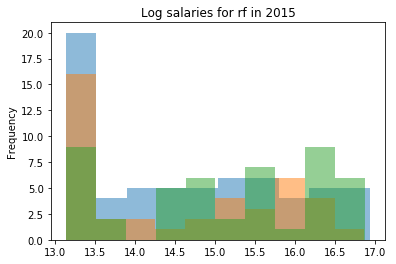

In [49]:
distribution_salary_pos(2015, 'lf')
distribution_salary_pos(2015, 'cf')
distribution_salary_pos(2015, 'rf')

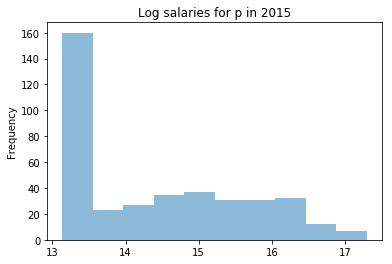

In [50]:
distribution_salary_pos(2015, 'p')

### Player Features

In [51]:
features = app_salary

In [52]:
features = features.merge(player)

In [58]:
features[['year', 'player_id', 'age', 'years_in_mlb']].sort_values(by=['player_id', 'year'])

,year,player_id,age,years_in_mlb
19014,2004,aardsda01,23.0,0.0
19015,2007,aardsda01,26.0,3.0
19016,2008,aardsda01,27.0,4.0
19017,2009,aardsda01,28.0,5.0
19018,2010,aardsda01,29.0,6.0
19019,2012,aardsda01,31.0,8.0
2985,1986,aasedo01,32.0,9.0
2986,1987,aasedo01,33.0,10.0
2987,1988,aasedo01,34.0,11.0
2988,1989,aasedo01,35.0,12.0


In [63]:
features[features.year == 2014].groupby('team_id').size()

team_id
ARI    24
ATL    24
BAL    28
BOS    29
CHA    24
CHN    26
CIN    28
CLE    26
COL    29
DET    23
HOU    20
KCA     1
LAA    27
LAN    31
MIA    26
MIL    27
MIN    27
NYA    24
NYN    27
OAK    26
PHI    32
PIT    28
SDN    27
SEA    25
SFN    27
SLN    27
TBA    25
TEX    23
TOR    25
WAS    30
dtype: int64

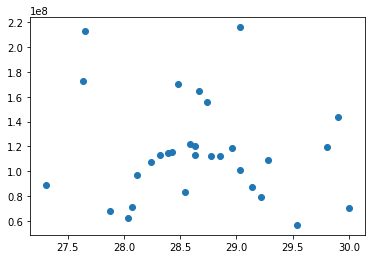

In [65]:
team_age = features[features.year == 2015].groupby('team_id')['age'].mean()
team_salary = features[features.year == 2015].groupby('team_id')['salary'].sum()
plt.scatter(team_age, team_salary)

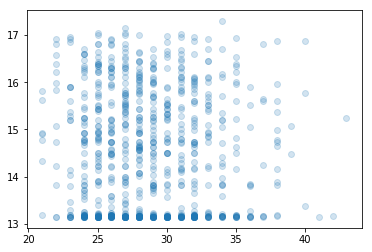

In [66]:
plt.scatter(features[features.year == 2015].age, np.log(features[features.year == 2015].salary), alpha=0.2)